In [1]:
#the adverage ratting from :
#does country
#most used words above 3
#does higher number of ingredents mean higher rating
#visual of averge rating of country of bean origin 

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Looking at the Data

In [3]:
df = pd.read_csv('../../../data/chocolate.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [5]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2362 non-null   int64  
 1   company_(manufacturer)            2362 non-null   object 
 2   company_location                  2362 non-null   object 
 3   review_date                       2362 non-null   int64  
 4   country_of_bean_origin            2362 non-null   object 
 5   specific_bean_origin_or_bar_name  2362 non-null   object 
 6   cocoa_percent                     2362 non-null   object 
 7   ingredients                       2274 non-null   object 
 8   most_memorable_characteristics    2362 non-null   object 
 9   rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


In [7]:
df.isna().sum()

ref                                  0
company_(manufacturer)               0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         88
most_memorable_characteristics       0
rating                               0
dtype: int64

# Dropping the Nulls

In [8]:
df = df.dropna()
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


# Changing Cocoa Percent object to float

In [9]:
df = df.replace('%', ' ', regex=True)

In [10]:
df['cocoa_percent'] = df['cocoa_percent'].astype(float)
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [11]:
df.dtypes

ref                                   int64
company_(manufacturer)               object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
ingredients                          object
most_memorable_characteristics       object
rating                              float64
dtype: object

# Groupby and mean of rating

In [12]:
cm=df.groupby(['company_(manufacturer)']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()
cm

{'Heirloom Cacao Preservation (Zokoko)': 3.875,
 'Ocelot': 3.875,
 'Matale': 3.8125,
 'Patric': 3.7916666666666665,
 'Idilio (Felchlin)': 3.775,
 'Kerchner': 3.75,
 'Landmark (Amano)': 3.75,
 "Chocola'te": 3.75,
 'Chokola': 3.75,
 'Timo A. Meyer': 3.75,
 'Utopick': 3.75,
 'Obolo': 3.75,
 'Nikoa': 3.75,
 'Benoit Nihant': 3.7083333333333335,
 'Madecasse (Cinagra)': 3.6875,
 'Fresh Coast aka Just Good Choc.': 3.6666666666666665,
 'Cacao Sampaka': 3.6666666666666665,
 'Captain Pembleton': 3.625,
 'Fresh Coast': 3.625,
 'Oialla by Bojessen (Malmo)': 3.625,
 'Raphio': 3.6,
 'Soma': 3.5913461538461537,
 'Durci': 3.5833333333333335,
 "Brasstown aka It's Chocolate": 3.5833333333333335,
 'Bar Au Chocolat': 3.5714285714285716,
 'Acalli': 3.5625,
 'Qantu': 3.5625,
 'Zokoko': 3.55,
 'Ritual': 3.5384615384615383,
 'Friis Holm': 3.5384615384615383,
 'Christopher Elbow': 3.5357142857142856,
 'Arete': 3.53125,
 'Potomac': 3.5277777777777777,
 'Bonnat': 3.5267857142857144,
 'Domori': 3.522727272727273,


In [13]:
cmcount = df['company_(manufacturer)'].value_counts(normalize=True).to_dict() 
#count of times this show up on the overall data
cmcount

{'Soma': 0.022867194371152155,
 'Arete': 0.014072119613016711,
 'Fresco': 0.013632365875109938,
 'Bonnat': 0.012313104661389622,
 'Pralus': 0.010993843447669306,
 'A. Morin': 0.010993843447669306,
 'Guittard': 0.009674582233948988,
 'Domori': 0.009674582233948988,
 'Valrhona': 0.009674582233948988,
 'Zotter': 0.009234828496042216,
 'Mast Brothers': 0.0079155672823219,
 'Dandelion': 0.0079155672823219,
 'Coppeneur': 0.0079155672823219,
 'Smooth Chocolator, The': 0.007475813544415127,
 'Castronovo': 0.007475813544415127,
 'Dick Taylor': 0.007475813544415127,
 'Scharffen Berger': 0.007475813544415127,
 "Duffy's": 0.007036059806508356,
 'Pierre Marcolini': 0.007036059806508356,
 'Rogue': 0.007036059806508356,
 'Artisan du Chocolat': 0.006596306068601583,
 'Palette de Bine': 0.006596306068601583,
 'Szanto Tibor': 0.006596306068601583,
 'Bittersweet Origins': 0.006156552330694811,
 'Hotel Chocolat (Coppeneur)': 0.006156552330694811,
 'Map Chocolate': 0.006156552330694811,
 'Tejas': 0.0061565

Text(0, 0.5, 'Weighted Rating')

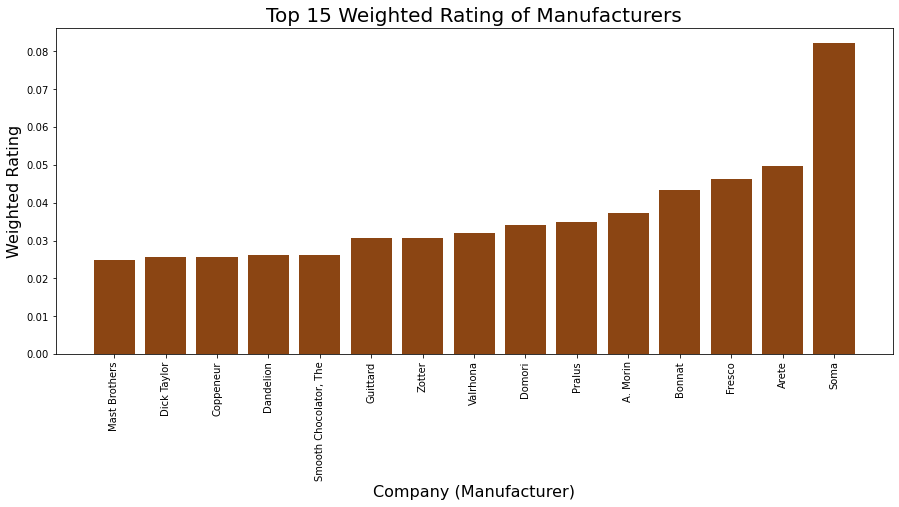

In [59]:
com_man = df['company_(manufacturer)'].unique()
weighted_rating = []
for company in com_man:
    count = cmcount[company]
    rating = cm[company]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, com_man)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:], color = 'saddlebrown')
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Rating of Manufacturers', fontsize=20)
plt.xlabel('Company (Manufacturer)', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [15]:
cl = df.groupby(['company_location']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()
cl 

{'Chile': 3.75,
 'Sao Tome': 3.5,
 'Poland': 3.5,
 'Argentina': 3.5,
 'U.A.E.': 3.375,
 'Australia': 3.3676470588235294,
 'Guatemala': 3.35,
 'Denmark': 3.338709677419355,
 'Vietnam': 3.3333333333333335,
 'Norway': 3.3333333333333335,
 'Scotland': 3.325,
 'Switzerland': 3.313953488372093,
 'Iceland': 3.3125,
 'Amsterdam': 3.3125,
 'Canada': 3.311320754716981,
 'Thailand': 3.3,
 'Brazil': 3.2717391304347827,
 'France': 3.2650602409638556,
 'Spain': 3.2642857142857142,
 'Austria': 3.2583333333333333,
 'Germany': 3.2564102564102564,
 'Israel': 3.25,
 'Bolivia': 3.25,
 'Italy': 3.25,
 'Suriname': 3.25,
 'Russia': 3.25,
 'Finland': 3.25,
 'Fiji': 3.25,
 'New Zealand': 3.2403846153846154,
 'Honduras': 3.2083333333333335,
 'Japan': 3.201923076923077,
 'Hungary': 3.2,
 'Colombia': 3.1875,
 'Belgium': 3.1875,
 'U.S.A.': 3.1829819277108435,
 'South Korea': 3.15625,
 'Singapore': 3.1538461538461537,
 'Philippines': 3.15,
 'Costa Rica': 3.138888888888889,
 'Madagascar': 3.1346153846153846,
 'Lithu

In [16]:
clcount = df['company_location'].value_counts(normalize=True).to_dict()
clcount

{'U.S.A.': 0.43799472295514513,
 'France': 0.07299912049252419,
 'Canada': 0.06992084432717678,
 'U.K.': 0.051890941072999124,
 'Italy': 0.029463500439753737,
 'Belgium': 0.024626209322779244,
 'Australia': 0.022427440633245383,
 'Ecuador': 0.022427440633245383,
 'Switzerland': 0.018909410729991204,
 'Germany': 0.017150395778364115,
 'Spain': 0.015391380826737027,
 'Denmark': 0.013632365875109938,
 'Venezuela': 0.013632365875109938,
 'Austria': 0.013192612137203167,
 'New Zealand': 0.011433597185576077,
 'Japan': 0.011433597185576077,
 'Hungary': 0.010993843447669306,
 'Colombia': 0.010554089709762533,
 'Brazil': 0.010114335971855761,
 'Peru': 0.008355321020228672,
 'Vietnam': 0.006596306068601583,
 'Singapore': 0.005716798592788039,
 'Madagascar': 0.005716798592788039,
 'Amsterdam': 0.005277044854881266,
 'Dominican Republic': 0.004837291116974494,
 'Nicaragua': 0.0043975373790677225,
 'Scotland': 0.0043975373790677225,
 'Taiwan': 0.0043975373790677225,
 'Guatemala': 0.004397537379067

Text(0, 0.5, 'Weighted Rating')

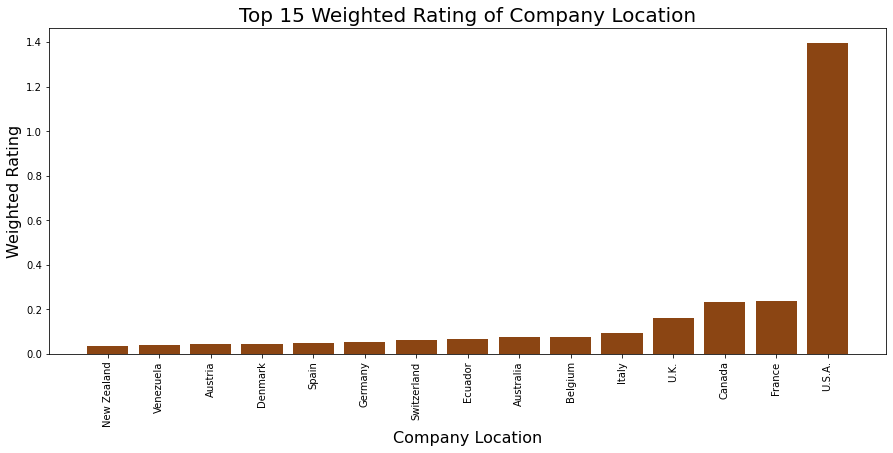

In [63]:
com_loc = df.company_location.unique()
weighted_rating = []
for company in com_loc:
    count = clcount[company]
    rating = cl[company]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, com_loc)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:], color = 'saddlebrown')
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Rating of Company Location', fontsize=20)
plt.xlabel('Company Location', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [18]:
beanori = pd.DataFrame(df.groupby(['country_of_bean_origin']).mean().sort_values(by='rating', ascending=False))['rating'].to_dict()
beanori

{'Sao Tome & Principe': 3.5,
 'Solomon Islands': 3.45,
 'Congo': 3.3181818181818183,
 'Thailand': 3.3,
 'Cuba': 3.2916666666666665,
 'Guatemala': 3.280701754385965,
 'Haiti': 3.2788461538461537,
 'Papua New Guinea': 3.2760416666666665,
 'Madagascar': 3.2685185185185186,
 'Vietnam': 3.2574626865671643,
 'Gabon': 3.25,
 'Tobago': 3.25,
 'Suriname': 3.25,
 'Sulawesi': 3.25,
 'Belize': 3.25,
 'Australia': 3.25,
 'Brazil': 3.25,
 'Nicaragua': 3.242021276595745,
 'Venezuela': 3.235355648535565,
 'Honduras': 3.2282608695652173,
 'Tanzania': 3.2282608695652173,
 'Trinidad': 3.2171052631578947,
 'Colombia': 3.212686567164179,
 'Ecuador': 3.212121212121212,
 'Dominican Republic': 3.2102439024390246,
 'Peru': 3.2011904761904764,
 'U.S.A.': 3.1875,
 'Bolivia': 3.185810810810811,
 'Jamaica': 3.1739130434782608,
 'Indonesia': 3.161764705882353,
 'Ghana': 3.15625,
 'Panama': 3.15625,
 'Costa Rica': 3.1547619047619047,
 'India': 3.130434782608696,
 'Mexico': 3.119565217391304,
 'Philippines': 3.105263

In [19]:
beanoricount = df['country_of_bean_origin'].value_counts(normalize=True).to_dict()
beanoricount

{'Venezuela': 0.10510114335971855,
 'Peru': 0.09234828496042216,
 'Dominican Republic': 0.0901495162708883,
 'Ecuador': 0.0870712401055409,
 'Madagascar': 0.0712401055408971,
 'Blend': 0.06156552330694811,
 'Nicaragua': 0.04133685136323659,
 'Bolivia': 0.032541776605101144,
 'Brazil': 0.032541776605101144,
 'Tanzania': 0.030343007915567283,
 'Belize': 0.029463500439753737,
 'Vietnam': 0.029463500439753737,
 'Colombia': 0.029463500439753737,
 'Guatemala': 0.025065963060686015,
 'Papua New Guinea': 0.021108179419525065,
 'Mexico': 0.020228671943711522,
 'Costa Rica': 0.018469656992084433,
 'Trinidad': 0.016710642040457344,
 'Ghana': 0.014072119613016711,
 'U.S.A.': 0.012313104661389622,
 'Haiti': 0.011433597185576077,
 'Jamaica': 0.010114335971855761,
 'Honduras': 0.010114335971855761,
 'India': 0.010114335971855761,
 'Philippines': 0.008355321020228672,
 'Indonesia': 0.007475813544415127,
 'Grenada': 0.007475813544415127,
 'Fiji': 0.006596306068601583,
 'Sao Tome': 0.006156552330694811,

Text(0, 0.5, 'Weighted Rating')

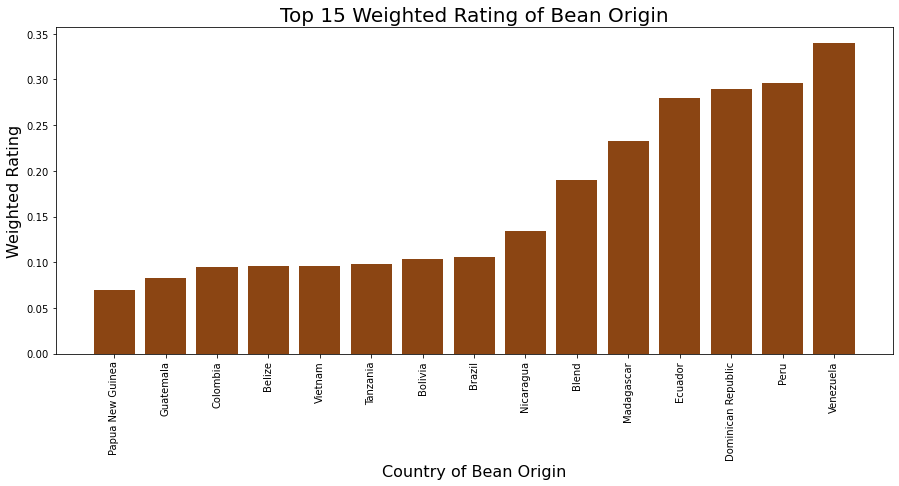

In [64]:
con_bean_ori = df.country_of_bean_origin.unique()
weighted_rating = []
for bean in con_bean_ori:
    count = beanoricount[bean]
    rating = beanori[bean]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, con_bean_ori)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:], color = 'saddlebrown')
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Rating of Bean Origin', fontsize=20)
plt.xlabel('Country of Bean Origin', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [21]:
sbobn = df.groupby(['specific_bean_origin_or_bar_name']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()
sbobn

{'Piura, Choc. Garage Exclusive': 4.0,
 'Guayas': 4.0,
 'Claudio Corallo w/ nibs': 4.0,
 'Bali, Sukrama Bros. Farm, Melaya, 62hr C': 4.0,
 'Piura, Illanka, Quemazon': 4.0,
 'Piura, Gran Blanco, lot 400': 4.0,
 'Coopertiva Amazona w/ nibs': 4.0,
 'Corona Arriba': 4.0,
 'Coto Brus, Heirloom, Batch 1': 4.0,
 'Coto Brus, Terciopelo': 4.0,
 'Crazy 88, Guat., D.R., Peru, Mad., PNG': 4.0,
 'Phantom': 4.0,
 "Bachelor's Hall E., St. Thomas Parish, batch bh1": 4.0,
 'Peruvian': 4.0,
 'Dancing in Your Head, 5 bean blend': 4.0,
 'Pablino': 4.0,
 'Asante': 4.0,
 'Otucan, Grand Cru': 4.0,
 'Dual Origins, Sambirano, Elvesia, batch SD06': 4.0,
 'El Rosario, Xoconuzco, Cusco, Sambirano': 4.0,
 'Ocumare 67, Puertofino': 4.0,
 'Equator, Peru, Dom. Rep': 4.0,
 'Fazenda Camboa, 2017 harvest': 4.0,
 'Porcelana, Pedegral': 4.0,
 'Porcelana, Sorotaima,Machiques,batch pcl001': 4.0,
 'Porcelana, Tabasco, La Joya': 4.0,
 'Tangara': 4.0,
 'Solomon Is.,batch 17158, N.Vela': 4.0,
 'Silvestre, Batch 7, 2013': 4.0,
 

In [22]:
sbobncount = df['specific_bean_origin_or_bar_name'].value_counts(normalize=True).to_dict()
sbobncount

{'Madagascar': 0.022867194371152155,
 'Ecuador': 0.016710642040457344,
 'Peru': 0.0158311345646438,
 'Dominican Republic': 0.015391380826737027,
 'Chuao': 0.010993843447669306,
 'Kokoa Kamili': 0.008355321020228672,
 'Venezuela': 0.008355321020228672,
 'Sambirano': 0.007475813544415127,
 'Papua New Guinea': 0.007475813544415127,
 'Belize': 0.007036059806508356,
 'Ocumare': 0.006596306068601583,
 'Ghana': 0.006156552330694811,
 'Tanzania': 0.006156552330694811,
 'Vietnam': 0.005716798592788039,
 'Porcelana': 0.005716798592788039,
 'Oko Caribe': 0.005716798592788039,
 'Brazil': 0.005277044854881266,
 'Ucayali': 0.005277044854881266,
 'Alto Beni': 0.005277044854881266,
 'Guatemala': 0.004837291116974494,
 'Grenada': 0.004837291116974494,
 'La Red': 0.004837291116974494,
 'Trinidad': 0.0043975373790677225,
 'Costa Rica': 0.0043975373790677225,
 'Piura': 0.0043975373790677225,
 'Maya Mountain': 0.0043975373790677225,
 'Nicaragua': 0.00395778364116095,
 'San Martin': 0.003518029903254178,
 '

In [23]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


Text(0, 0.5, 'Weighted Rating')

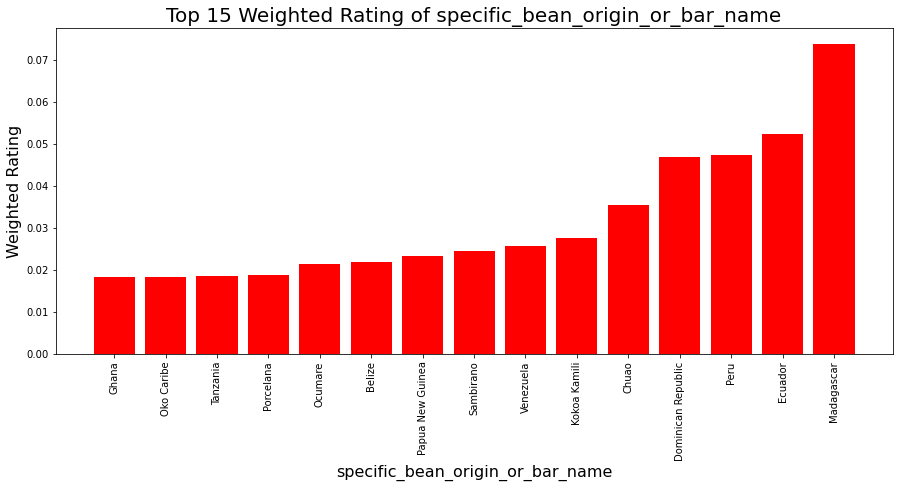

In [66]:
spec_ori = df.specific_bean_origin_or_bar_name.unique()
weighted_rating = []
for bean in spec_ori:
    count = sbobncount[bean]
    rating = sbobn[bean]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, spec_ori)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:], color = 'r')
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Rating of specific_bean_origin_or_bar_name', fontsize=20)
plt.xlabel('specific_bean_origin_or_bar_name', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [25]:
cp = df.groupby(['cocoa_percent']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()
cp

{50.0: 3.75,
 63.0: 3.5208333333333335,
 69.0: 3.4791666666666665,
 78.0: 3.3875,
 67.0: 3.3636363636363638,
 66.0: 3.355769230769231,
 88.0: 3.2857142857142856,
 68.0: 3.2827868852459017,
 70.0: 3.2680988184747584,
 56.0: 3.25,
 87.0: 3.25,
 86.0: 3.25,
 74.0: 3.217741935483871,
 72.0: 3.1990384615384615,
 64.0: 3.193548387096774,
 73.0: 3.180327868852459,
 65.0: 3.178125,
 75.0: 3.1620689655172414,
 71.5: 3.125,
 73.5: 3.125,
 58.0: 3.125,
 90.0: 3.107142857142857,
 80.0: 3.08125,
 71.0: 3.0714285714285716,
 77.0: 3.0675675675675675,
 82.0: 3.0588235294117645,
 76.0: 3.007575757575758,
 60.0: 3.0056818181818183,
 79.0: 3.0,
 85.0: 2.973684210526316,
 62.0: 2.966666666666667,
 61.0: 2.9642857142857144,
 100.0: 2.9583333333333335,
 83.0: 2.9375,
 81.0: 2.9166666666666665,
 55.0: 2.9,
 84.0: 2.8125,
 42.0: 2.75,
 46.0: 2.75,
 60.5: 2.75,
 57.0: 2.75,
 72.5: 2.75,
 89.0: 2.625,
 91.0: 2.1666666666666665,
 53.0: 2.0,
 99.0: 2.0}

In [26]:
cpcount = df['cocoa_percent'].value_counts(normalize=True).to_dict()
cpcount

{70.0: 0.4094107299912049,
 75.0: 0.12752858399296393,
 72.0: 0.11433597185576078,
 65.0: 0.03518029903254178,
 80.0: 0.03518029903254178,
 74.0: 0.027264731750219876,
 73.0: 0.026824978012313105,
 68.0: 0.026824978012313105,
 60.0: 0.019349164467897976,
 71.0: 0.018469656992084433,
 85.0: 0.016710642040457344,
 77.0: 0.016270888302550572,
 76.0: 0.014511873350923483,
 67.0: 0.014511873350923483,
 64.0: 0.013632365875109938,
 66.0: 0.011433597185576077,
 78.0: 0.008795074758135445,
 82.0: 0.007475813544415127,
 62.0: 0.006596306068601583,
 55.0: 0.006596306068601583,
 69.0: 0.005277044854881266,
 63.0: 0.005277044854881266,
 58.0: 0.003518029903254178,
 61.0: 0.0030782761653474055,
 88.0: 0.0030782761653474055,
 90.0: 0.0030782761653474055,
 81.0: 0.002638522427440633,
 100.0: 0.002638522427440633,
 83.0: 0.001759014951627089,
 72.5: 0.001759014951627089,
 84.0: 0.001759014951627089,
 91.0: 0.0013192612137203166,
 56.0: 0.0008795074758135445,
 73.5: 0.0008795074758135445,
 89.0: 0.0008

Text(0, 0.5, 'Weighted Rating')

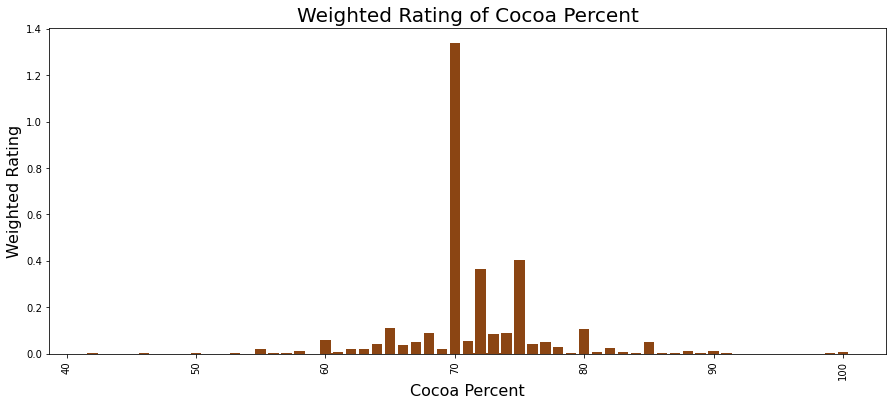

In [69]:
coco_per = df.cocoa_percent.unique()
weighted_rating = []
for percentage in coco_per:
    count = cpcount[percentage]
    rating = cp[percentage]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, coco_per)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x, y, color = 'saddlebrown')
plt.xticks(rotation=90);
plt.title('Weighted Rating of Cocoa Percent', fontsize=20)
plt.xlabel('Cocoa Percent', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [28]:
rd=df.groupby(['review_date']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()
rd

{2021: 3.5,
 2017: 3.3627450980392157,
 2011: 3.2712418300653594,
 2020: 3.256172839506173,
 2015: 3.24375,
 2016: 3.236046511627907,
 2013: 3.2148876404494384,
 2012: 3.2069444444444444,
 2014: 3.197530864197531,
 2018: 3.1915555555555555,
 2010: 3.1888297872340425,
 2007: 3.1666666666666665,
 2019: 3.134020618556701,
 2009: 3.088495575221239,
 2006: 3.0625,
 2008: 3.0386904761904763}

In [29]:
rdcount = df['review_date'].value_counts(normalize=True).to_dict()
rdcount

{2015: 0.12313104661389622,
 2014: 0.10686015831134564,
 2018: 0.09894459102902374,
 2016: 0.09454705364995603,
 2019: 0.0853122251539138,
 2012: 0.079155672823219,
 2013: 0.07827616534740545,
 2011: 0.06728232189973615,
 2009: 0.04969217238346526,
 2017: 0.044854881266490766,
 2010: 0.04133685136323659,
 2008: 0.036939313984168866,
 2020: 0.03562005277044855,
 2007: 0.030343007915567283,
 2006: 0.026385224274406333,
 2021: 0.0013192612137203166}

Text(0, 0.5, 'Weighted Rating')

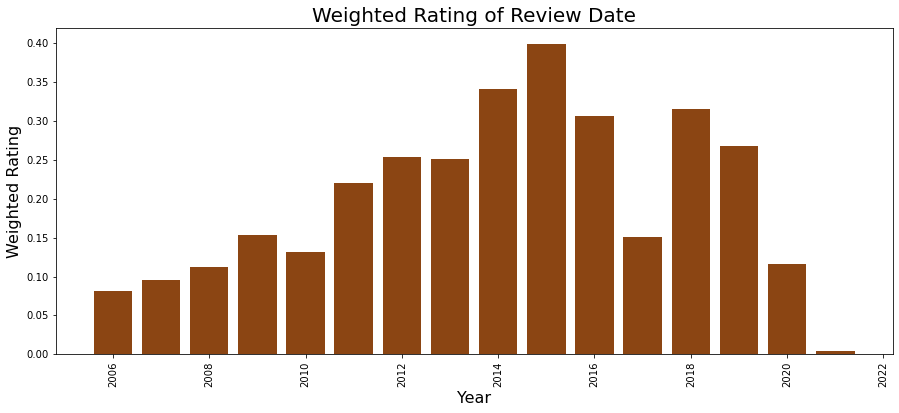

In [70]:
rwd = df.review_date.unique()
weighted_rating = []
for date in rwd:
    count = rdcount[date]
    rating = rd[date]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, rwd)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x, y, color = 'saddlebrown')
plt.xticks(rotation=90);
plt.title('Weighted Rating of Review Date', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

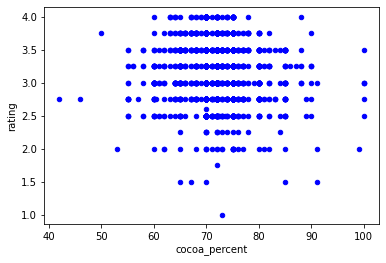

In [31]:
ax1 = df.plot.scatter(x='cocoa_percent', y='rating', c='blue', colormap='viridis') #standerscaler in the modeling #classification projrct

In [32]:
df.groupby('company_(manufacturer)').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
company_(manufacturer),,
Soma,52,3.591346
Arete,32,3.531250
Fresco,31,3.403226
Bonnat,28,3.526786
A. Morin,25,3.400000
...,...,...
Casa,1,2.000000
Jacque Torres,1,2.000000
Ki' Xocolatl,1,2.000000


In [33]:
df.groupby('company_location').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
company_location,,
U.S.A.,996,3.182982
France,166,3.265060
Canada,159,3.311321
U.K.,118,3.103814
Italy,67,3.250000
...,...,...
Suriname,1,3.250000
Ghana,1,2.750000
Martinique,1,2.750000


In [34]:
df.groupby('country_of_bean_origin').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
country_of_bean_origin,,
Venezuela,239,3.235356
Peru,210,3.201190
Dominican Republic,205,3.210244
Ecuador,198,3.212121
Madagascar,162,3.268519
...,...,...
DR Congo,1,3.000000
Sumatra,1,3.000000
Martinique,1,2.750000


In [35]:
df.groupby('specific_bean_origin_or_bar_name').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
specific_bean_origin_or_bar_name,,
Madagascar,52,3.235577
Ecuador,38,3.144737
Peru,36,3.000000
Dominican Republic,35,3.057143
Chuao,25,3.240000
...,...,...
"Venezuela; Barinos, Merida, Tachron",1,2.000000
Brazil Rio Doce,1,1.750000
Le Noir Extra Amer,1,1.500000


In [36]:
df.groupby('cocoa_percent').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
cocoa_percent,,
70.0,931,3.268099
75.0,290,3.162069
72.0,260,3.199038
65.0,80,3.178125
80.0,80,3.081250
74.0,62,3.217742
68.0,61,3.282787
73.0,61,3.180328
60.0,44,3.005682


In [37]:
X = df.drop('rating', axis = 1) #Feature
y = df.rating #Target

In [38]:
X_t, X_test, y_t, y_test = train_test_split(X, y, random_state=2021)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, random_state=2021)

In [39]:
X_train.isna().sum()

ref                                 0
company_(manufacturer)              0
company_location                    0
review_date                         0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
ingredients                         0
most_memorable_characteristics      0
dtype: int64

In [40]:
X_val.isna().sum()

ref                                 0
company_(manufacturer)              0
company_location                    0
review_date                         0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
ingredients                         0
most_memorable_characteristics      0
dtype: int64

In [41]:
X_train.dtypes

ref                                   int64
company_(manufacturer)               object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
ingredients                          object
most_memorable_characteristics       object
dtype: object

In [42]:
df['company_location'].value_counts(ascending=False)

U.S.A.                   996
France                   166
Canada                   159
U.K.                     118
Italy                     67
                        ... 
St.Vincent-Grenadines      1
Suriname                   1
Martinique                 1
Ghana                      1
Russia                     1
Name: company_location, Length: 67, dtype: int64

In [43]:
df['cocoa_percent']

0       76.0
1       76.0
2       76.0
3       63.0
4       70.0
        ... 
2357    80.0
2358    75.0
2359    72.0
2360    70.0
2361    75.0
Name: cocoa_percent, Length: 2274, dtype: float64

In [44]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [45]:
rating_class = [1 if r >=3 else 0 for r in df['rating']]

In [46]:
np.unique(rating_class, return_counts=True)

(array([0, 1]), array([ 507, 1767]))

In [47]:
greatcho = df[df.rating == 4]
greatcho

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,"4- B,S,C,L","oily, nut, caramel, raspberry",4.0
6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,"3- B,S,C","sweet, cocoa, tangerine",4.0
16,1319,A. Morin,France,2014,Peru,Pablino,70.0,"4- B,S,C,L","delicate, hazelnut, brownie",4.0
72,470,Amano,U.S.A.,2010,Ecuador,Guayas,70.0,"4- B,S,C,V","strong spice, intense pepper",4.0
75,725,Amano,U.S.A.,2011,Papua New Guinea,Morobe,70.0,"4- B,S,C,V","tart, lemon, smoke",4.0
...,...,...,...,...,...,...,...,...,...,...
2239,757,Valrhona,France,2011,Venezuela,"Porcelana, Pedegral",64.0,"5- B,S,C,V,L","creamy, honey,peanut butter",4.0
2241,931,Valrhona,France,2012,Venezuela,"Otucan, Grand Cru",69.0,"5- B,S,C,V,L","green,unripened fruit,banana",4.0
2244,1510,Valrhona,France,2015,Peru,"Piura, Illanka, Quemazon",63.0,"5- B,S,C,V,L","intense, dark berry, grapes",4.0
2297,1848,Willie's Cacao,U.K.,2016,Colombia,Los Llanos,70.0,"3- B,S,C","rich cocoa, spicy, cinamon",4.0


In [48]:
greatcho.groupby('company_(manufacturer)').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
company_(manufacturer),,
Soma,13,4.0
Bonnat,8,4.0
Arete,6,4.0
Domori,4,4.0
Fresco,4,4.0
Idilio (Felchlin),4,4.0
Valrhona,4,4.0
A. Morin,3,4.0
Cacao Sampaka,3,4.0


In [49]:
greatcho.groupby('company_location').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
company_location,,
U.S.A.,37,4.0
France,16,4.0
Canada,14,4.0
Switzerland,6,4.0
Belgium,5,4.0
Australia,4,4.0
Italy,4,4.0
U.K.,4,4.0
Ecuador,3,4.0


In [50]:
greatcho.groupby('country_of_bean_origin').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
country_of_bean_origin,,
Venezuela,18,4.0
Peru,17,4.0
Madagascar,11,4.0
Ecuador,8,4.0
Blend,7,4.0
Bolivia,5,4.0
Colombia,5,4.0
Brazil,4,4.0
Papua New Guinea,4,4.0


In [51]:
greatcho.groupby('specific_bean_origin_or_bar_name').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
specific_bean_origin_or_bar_name,,
Chuao,3,4.0
Madagascar,3,4.0
Piura,3,4.0
Ecuador,2,4.0
Haiti,2,4.0
...,...,...
"Tien Giang, Black S., batch VIT60420.0",1,4.0
Ucayali,1,4.0
"Wild Beni, Lower Rio Beni, Tranquilidad, 2015",1,4.0


In [52]:
greatcho.groupby('cocoa_percent').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
cocoa_percent,,
70.0,53,4.0
75.0,15,4.0
72.0,12,4.0
74.0,4,4.0
63.0,3,4.0
64.0,3,4.0
67.0,3,4.0
68.0,2,4.0
69.0,2,4.0


In [53]:
greatcho.groupby('review_date').agg(['count', 'mean'])['rating'].sort_values(by=['count', 'mean'], ascending=False)

,count,mean
review_date,,
2011,15,4.0
2013,13,4.0
2018,11,4.0
2012,10,4.0
2016,9,4.0
2007,8,4.0
2015,8,4.0
2014,6,4.0
2017,5,4.0
